In [24]:
import os
import numpy as np
import re
import pickle
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import datetime
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors

sys.path.insert(1, '../')
from SeasonalPlot_Functions import *
from LoadingPlot_Functions import *

In [3]:
home_dir = '/nfs/a319/gy17m2a/PhD/'
home_dir2 = '/nfs/a161/gy17m2a/PhD/'

In [4]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Great Britain
gb_outline = gdf[(gdf.name == "United Kingdom")]

In [181]:
quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
quintile_mapping_thirds = {1: 'F', 2: 'C', 3: 'B'}
quintile_cats = ['F2','F1', 'C', 'B1', 'B2']
color_mapping = {'F2': (0.0, 0.0, 1.0, 0.6),   'F1': (0.0, 0.6902, 1.0, 0.6),
    'C': (0.5, 0.5, 0.5, 0.6), 'B1': (0.8039, 0.0, 0.0, 0.6),'B2': (0.5451, 0.0, 0.0, 0.6)} 

In [6]:
tbo_vals = pd.read_csv(home_dir + 'datadir/RainGauge/interarrival_thresholds_CDD_noMissing.txt')
tbo_vals = tbo_vals[tbo_vals['Lon']!=-999.0]
tbo_vals['gauge_num'] = tbo_vals.index

### Read in data

In [7]:
df_changes_season =pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_season_changes.csv")
df_changes=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/grouped_by_gauge_samplingdur_changes.csv")

In [ ]:
df_changes_summer =df_changes_season[df_changes_season['season']=="Summer"]
df_changes_autumn =df_changes_season[df_changes_season['season']=="Autumn"]

In [258]:
df_long=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/all_events_characteristics.csv")
df_long = df_long[df_long['duration'] >1.5]
present=df_long[df_long['Climate']=='Present']
future=df_long[df_long['Climate']=='Future']

nimrod = pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/NIMROD_30mins/all_events_characteristics.csv")
nimrod = nimrod[nimrod['duration'] >1.5]

### Remove events with less than 3 data points

In [192]:
my_dict = {'Present (UKCP18)' :present, 'Future (UKCP18)':future,
           'NIMROD':nimrod}
short_ids = ['Present (UKCP18)', 'Future (UKCP18)', 'NIMROD']
from statsmodels.graphics.mosaicplot import mosaic

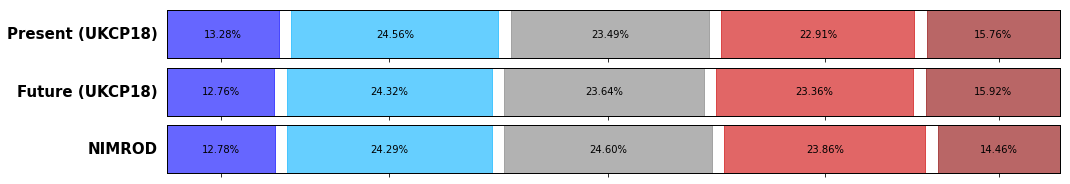

In [193]:
# Create the subplots
fig, axs = plt.subplots(nrows=len(short_ids), figsize=(16, 3), sharex=True)

# Loop over each id and create the plots
for i, id in enumerate(short_ids):
    create_single_variable_mosaic_plot_pctlabels(axs[i], my_dict[id], 'Loading_profile_molly', 
        quintile_cats, color_mapping,  short_ids[i])

# Add the overall title
# fig.suptitle('All events', fontweight="bold", fontsize=20);

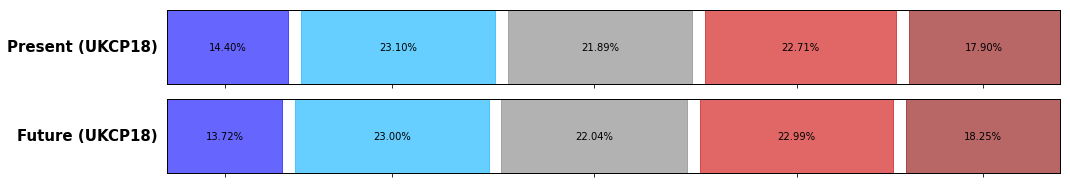

In [254]:
df_long=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/all_events_characteristics.csv")
df_long = df_long[df_long['duration'] >1.5]
df_long = df_long[df_long['area']=='NE']

present=df_long[df_long['Climate']=='Present']
future=df_long[df_long['Climate']=='Future']
my_dict = {'Present (UKCP18)' :present, 'Future (UKCP18)':future}
short_ids = ['Present (UKCP18)', 'Future (UKCP18)']

# Create the subplots
fig, axs = plt.subplots(nrows=len(short_ids), figsize=(16, 3), sharex=True)

# Loop over each id and create the plots
for i, id in enumerate(short_ids):
    create_single_variable_mosaic_plot_pctlabels(axs[i], my_dict[id], 'Loading_profile_molly', 
        quintile_cats, color_mapping,  short_ids[i])

# Add the overall title
# fig.suptitle('All events', fontweight="bold", fontsize=20);

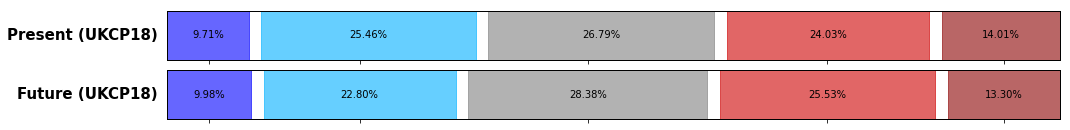

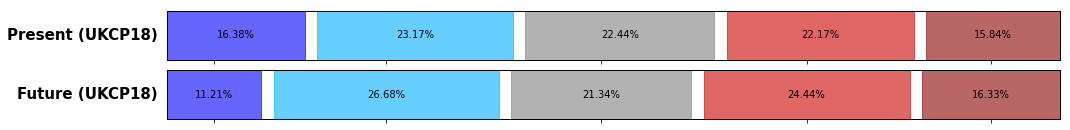

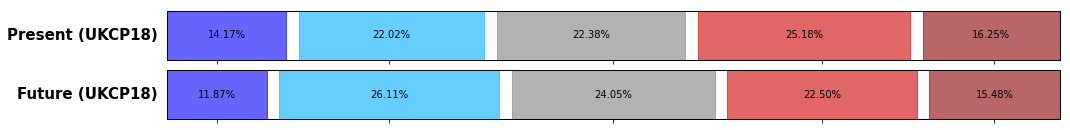

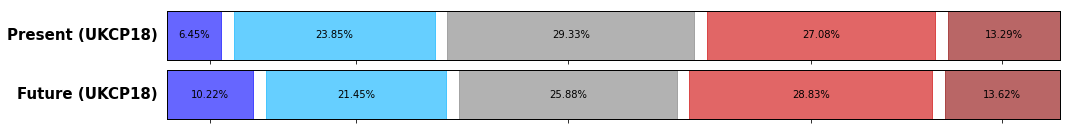

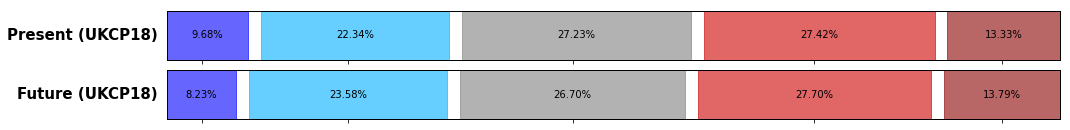

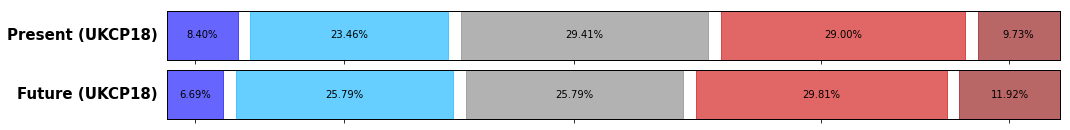

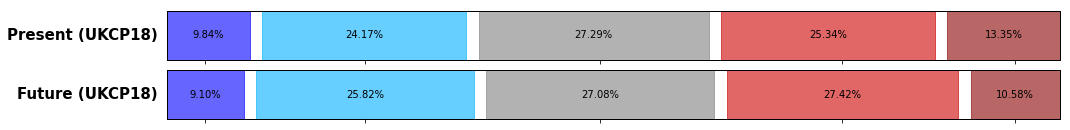

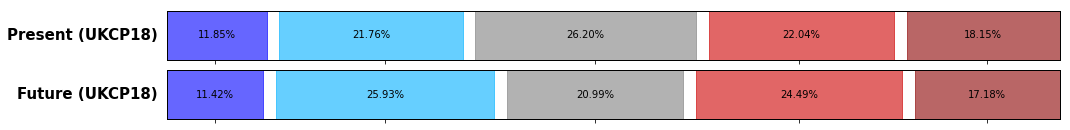

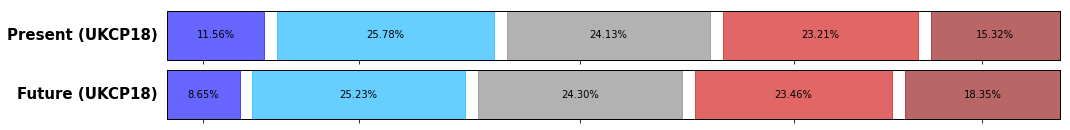

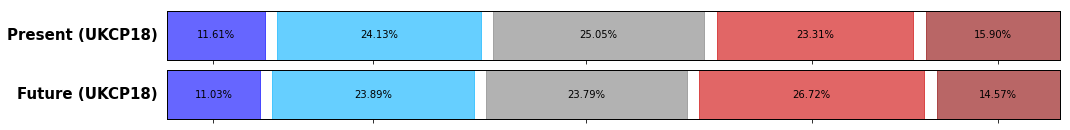

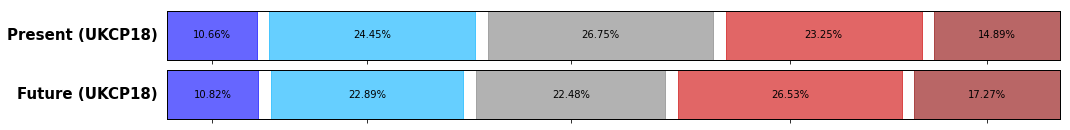

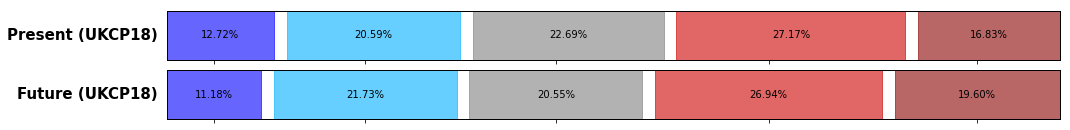

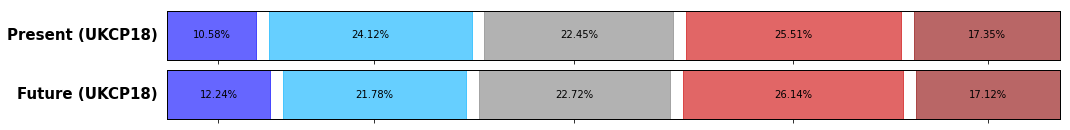

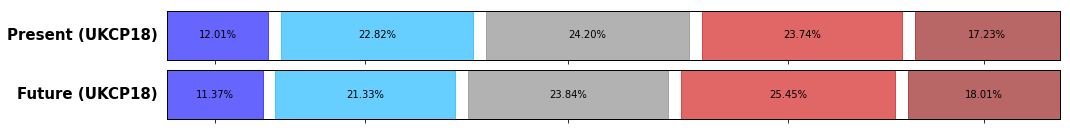

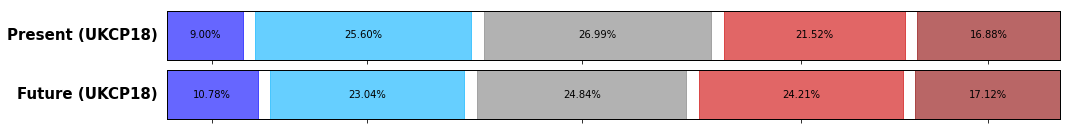

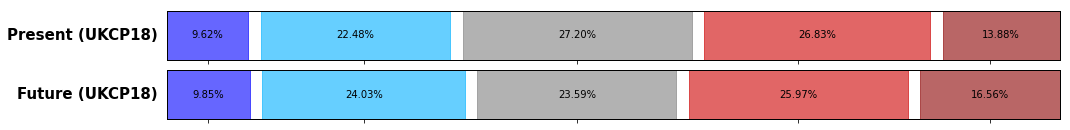

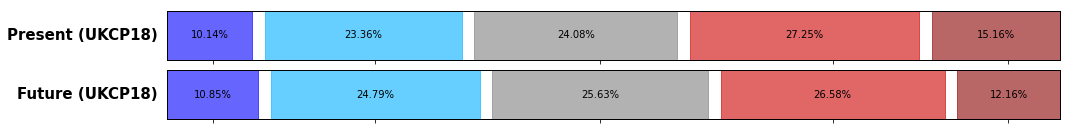

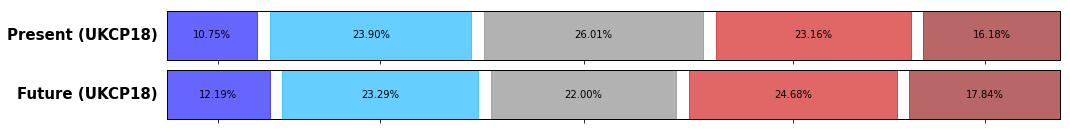

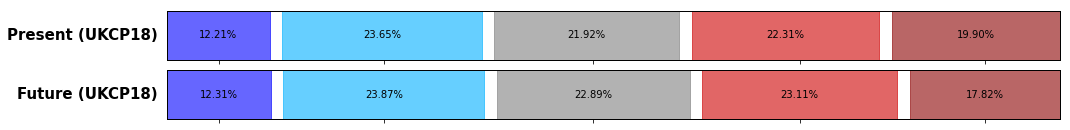

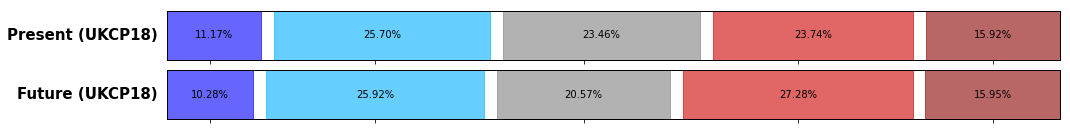

In [259]:
for gauge_num in range(1000,1020):
    present_thisgauge=present[present['gauge_num']==gauge_num]
    future_thisgauge=future[future['gauge_num']==gauge_num]
    short_ids = ['Present (UKCP18)', 'Future (UKCP18)']
    my_dict = {'Present (UKCP18)' :present_thisgauge, 'Future (UKCP18)':future_thisgauge}

    # Create the subplots
    fig, axs = plt.subplots(nrows=len(short_ids), figsize=(16, 2), sharex=True)

    # Loop over each id and create the plots
    for i, id in enumerate(short_ids):
        create_single_variable_mosaic_plot_pctlabels(axs[i], my_dict[id], 'Loading_profile_molly', 
            quintile_cats, color_mapping,  short_ids[i])


# D50 analysis

## Present + future + change (all durations lumped)  

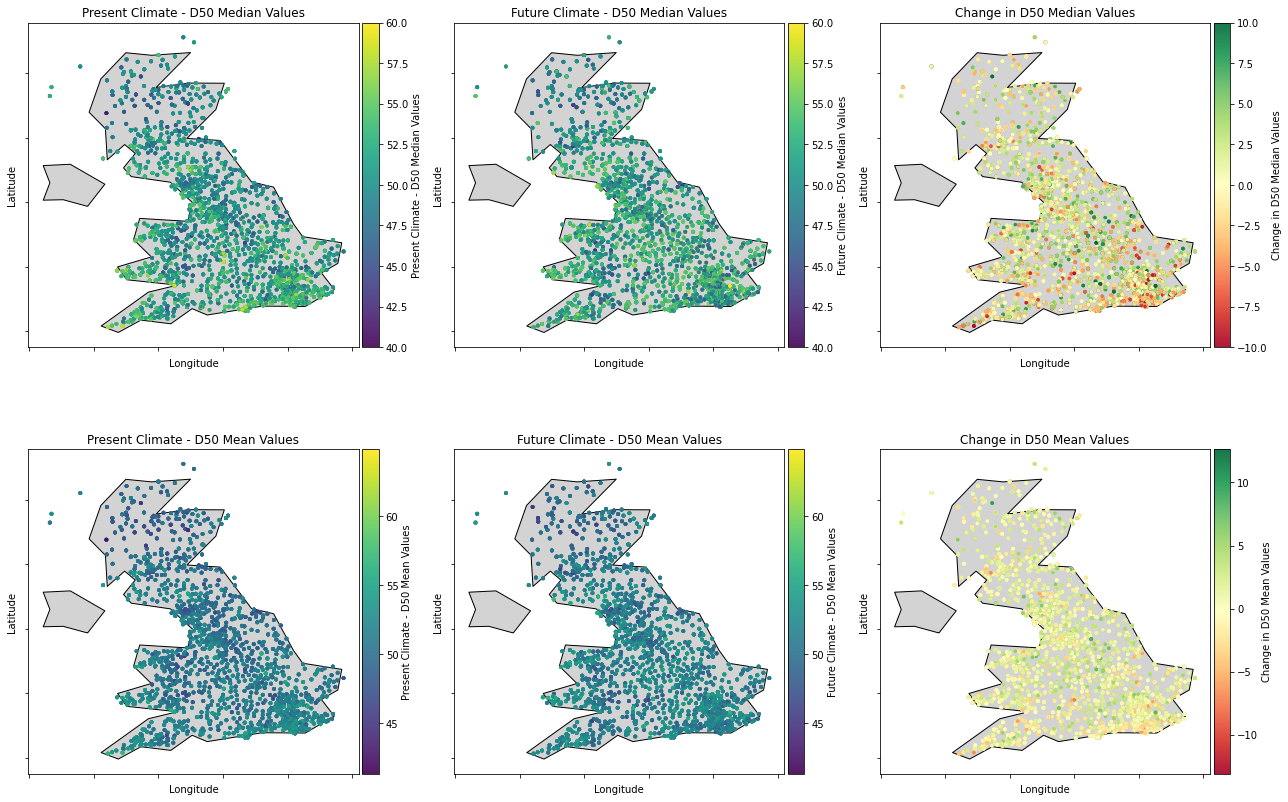

In [242]:
# Create a figure and axes for the six subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Present Climate 
present_medianD50_data = df_changes[['gauge_num', 'D50_median_present']].copy()
present_medianD50_data['Climate'] = 'present'  # Add a Climate column for clarity
# Future Climate
future_medianD50_data = df_changes[['gauge_num', 'D50_median_future']].copy()
future_medianD50_data['Climate'] = 'future'  # Add a Climate column for clarity

global_min = min(present_medianD50_data['D50_median_present'].min(),
    future_medianD50_data['D50_median_future'].min())

global_max = max(present_medianD50_data['D50_median_present'].max(),
    future_medianD50_data['D50_median_future'].max())


plot_values_on_map(axes[0, 0], present_medianD50_data, 'Present Climate - D50 Median Values', tbo_vals,
                   'D50_median_present', 40, 60)
plot_values_on_map(axes[0, 1], future_medianD50_data, 'Future Climate - D50 Median Values', tbo_vals, 
                    'D50_median_future', 40, 60)

# # Change 
change_medianD50_data = df_changes[['gauge_num', 'D50_median_diff']].copy()
change_medianD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[0, 2], change_medianD50_data, 'Change in D50 Median Values', tbo_vals, 'D50_median_diff', 
                   vmin=-10, vmax=+10, cmap = 'RdYlGn')


present_meanD50_data = df_changes[['gauge_num', 'D50_mean_present']].copy()
present_meanD50_data['Climate'] = 'present'  # Add a Climate column for clarity
future_meanD50_data = df_changes[['gauge_num', 'D50_mean_future']].copy()
future_meanD50_data['Climate'] = 'present'  # Add a Climate column for clarity

global_min = min(present_meanD50_data['D50_mean_present'].min(),
    future_meanD50_data['D50_mean_future'].min())

global_max = max(present_meanD50_data['D50_mean_present'].max(),
    future_meanD50_data['D50_mean_future'].max())


plot_values_on_map(axes[1, 0], present_meanD50_data, 'Present Climate - D50 Mean Values', tbo_vals, 
                   'D50_mean_present', global_min, global_max)
plot_values_on_map(axes[1, 1], future_meanD50_data, 'Future Climate - D50 Mean Values', tbo_vals, 
                    'D50_mean_future', global_min, global_max)

# # Change 
change_meanD50_data = df_changes[['gauge_num', 'D50_mean_diff']].copy()
change_meanD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[1, 2], change_meanD50_data, 'Change in D50 Mean Values', tbo_vals, 'D50_mean_diff', 
                   vmin=None, vmax=None, cmap = 'RdYlGn')

# Adjust layout
plt.tight_layout()


### Try for just one duration

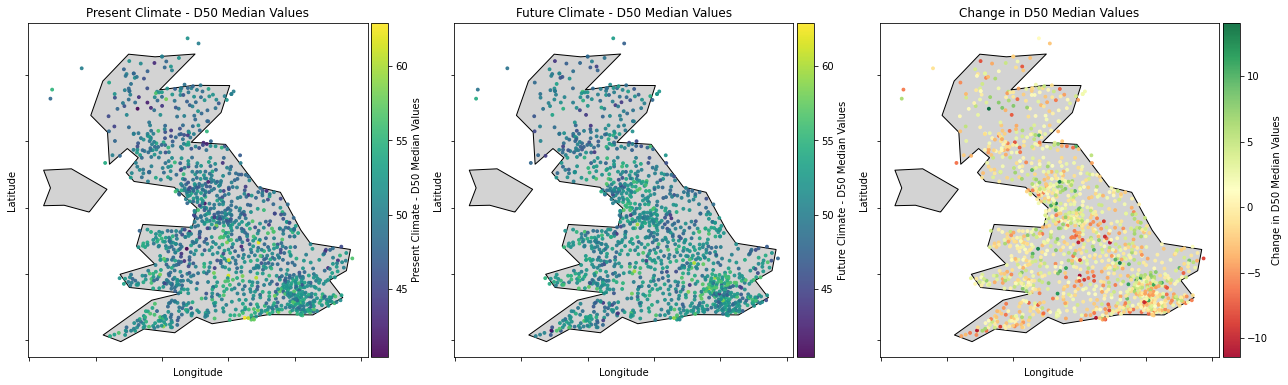

In [158]:
df_changes_1h = df_changes_autumn[df_changes_autumn['dur_for_which_this_is_amax']==12]
the_df = df_changes_1h

# Create a figure and axes for the six subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 12))

# Present Climate 
present_medianD50_data = the_df[['gauge_num', 'D50_median_present']].copy()
present_medianD50_data['Climate'] = 'present'  # Add a Climate column for clarity
# Future Climate
future_medianD50_data = the_df[['gauge_num', 'D50_median_future']].copy()
future_medianD50_data['Climate'] = 'future'  # Add a Climate column for clarity

global_min = min(present_medianD50_data['D50_median_present'].min(),
    future_medianD50_data['D50_median_future'].min())
global_max = max(present_medianD50_data['D50_median_present'].max(),
    future_medianD50_data['D50_median_future'].max())


plot_values_on_map(axes[0], present_medianD50_data, 'Present Climate - D50 Median Values', tbo_vals,
                   'D50_median_present', global_min, global_max)
plot_values_on_map(axes[1], future_medianD50_data, 'Future Climate - D50 Median Values', tbo_vals, 
                    'D50_median_future', global_min, global_max)

# # Change 
change_medianD50_data = the_df[['gauge_num', 'D50_median_diff']].copy()
change_medianD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[2], change_medianD50_data, 'Change in D50 Median Values', tbo_vals, 'D50_median_diff', 
                   vmin=None, vmax=None, cmap = 'RdYlGn')

plt.tight_layout()


## Present day variation, split by duration
### Mean

In [41]:
# Define the unique durations to iterate over
durations = df_changes['dur_for_which_this_is_amax'].unique()
durations = ['1', '2', '3', '6', '12', '24']

In [205]:
# D50_mean_present
for duration in durations:
    h_1 = df_changes[df_changes['dur_for_which_this_is_amax'] ==float(duration)]
    print(h_1["D50_mean_present"].mean())

53.806769460815225
52.47535691795009
51.84800237373872
50.612891247115535
50.9126364851278
50.728901806879726


In [260]:
def plot_change_variable_for_duration(ax, variable, duration, df_changes, tbo_vals, cmap='viridis'):
    # Filter the data for the given duration
    change_R_data = df_changes[df_changes['dur_for_which_this_is_amax'] == float(duration)][['gauge_num', variable]]
    
    # Get longitude and latitude from gauge locations
    gauge_locs = change_R_data['gauge_num'].copy()

    # Now index into gauge_locations with the copied values
    lon = tbo_vals.loc[gauge_locs, 'Lon']
    lat = tbo_vals.loc[gauge_locs, 'Lat']
    
    # Plot the background outline of Great Britain
    gb_outline.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=1)
    
    # Scatter plot for theta change with vmin and vmax centered around 50
    vmin = 50 - 5  # Lower limit (25 units below 50)
    vmax = 50 + 5  # Upper limit (25 units above 50)
    scatter = ax.scatter(lon, lat, c=change_R_data[variable], cmap=cmap, edgecolor=None, s=8, alpha=1, vmin=vmin, vmax=vmax)
    
    ax.set_title(f'Sampling dur: {duration} hours')
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])

    # Create a color bar that is scaled to the size of the plot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)  # Control the width and padding of the colorbar
    plt.colorbar(scatter, cax=cax, label=f'{variable}') 


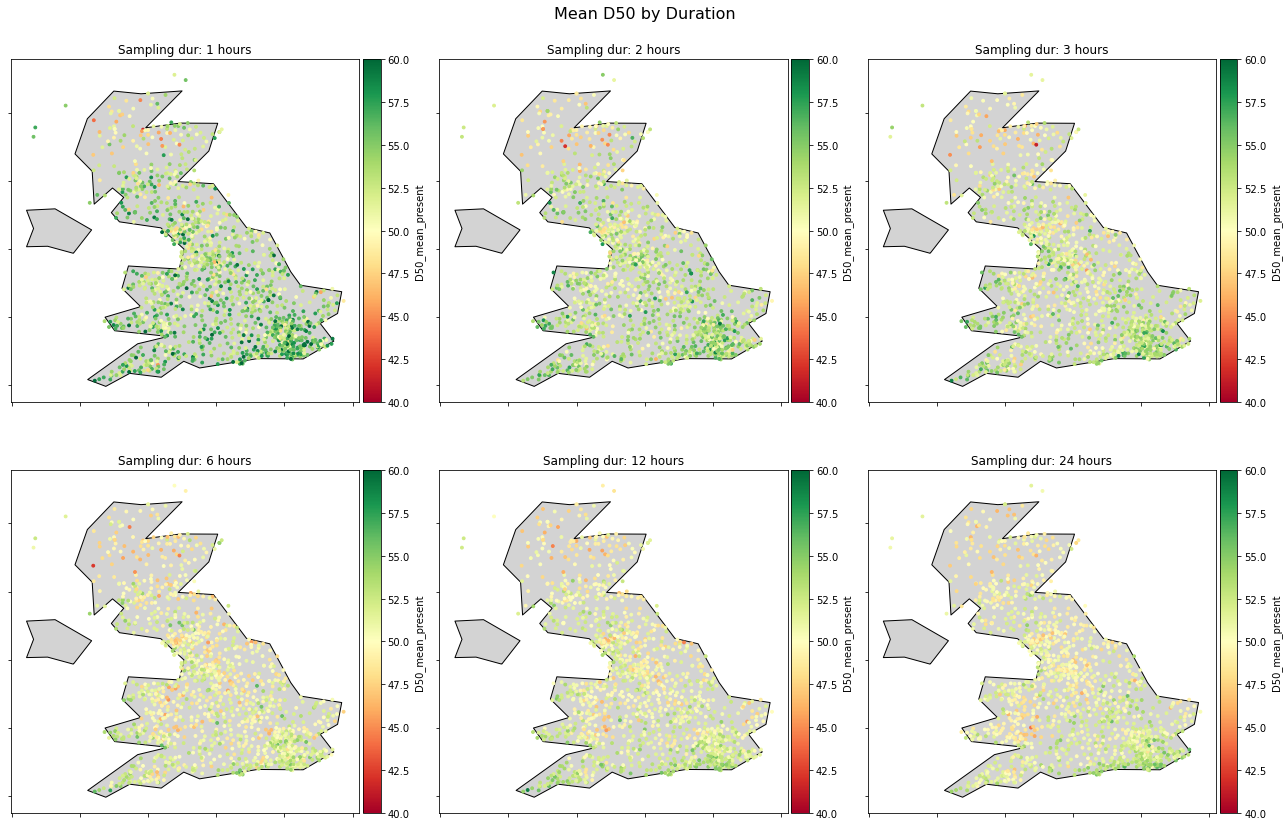

In [214]:
fig_D50 = plt.figure(figsize=(18, 12))
D50_axes = fig_D50.subplots(2, 3).flatten()  # Flatten the 2x4 grid into a 1D array

# Plot for each duration for theta
for i, duration in enumerate(durations):
    ax = D50_axes[i]  # Access the flattened array
    plot_change_variable_for_duration(ax, 'D50_mean_present', duration, df_changes, tbo_vals, cmap='RdYlGn')
#     plot_change_D50_for_duration(ax, duration,'D50_mean', present_df, tbo_vals)

# Adjust layout for theta figure
plt.suptitle('Mean D50 by Duration', fontsize=16)
# plt.subplots_adjust(top=0.9)  # Adjust title position
plt.tight_layout()
plt.show()

### Median

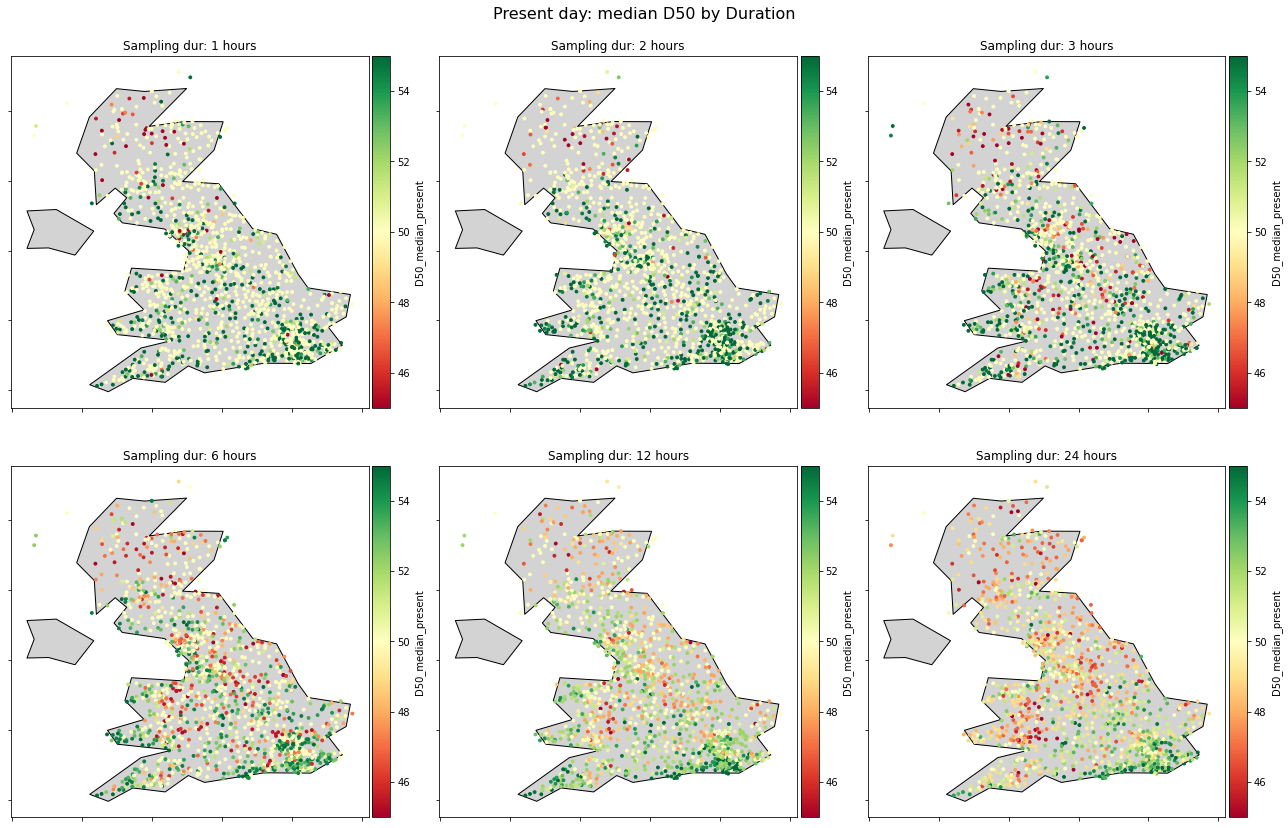

In [261]:
fig_D50 = plt.figure(figsize=(18, 12))
D50_axes = fig_D50.subplots(2, 3).flatten()  # Flatten the 2x4 grid into a 1D array

# Plot for each duration for theta
for i, duration in enumerate(durations):
    ax = D50_axes[i]  # Access the flattened array
    plot_change_variable_for_duration(ax, 'D50_median_present', duration, df_changes, tbo_vals, cmap='RdYlGn')
#     plot_change_D50_for_duration(ax, duration,'D50_mean', present_df, tbo_vals)

# Adjust layout for theta figure
plt.suptitle('Present day: median D50 by Duration', fontsize=16)
# plt.subplots_adjust(top=0.9)  # Adjust title position
plt.tight_layout()
plt.show()

## Change from present to future, split by duration

In [223]:
# Define the custom colormap: two colors for the condition
cmap = mcolors.ListedColormap(['blue', 'red'])  # Blue for < 50, Red for >= 50
bounds = [0, 0.5, 1]  # Define boundaries for the colors
norm = mcolors.BoundaryNorm(bounds, cmap.N)

In [228]:
def plot_change_variable_for_duration(ax, variable, duration, df_changes, tbo_vals, cmap='viridis'):
    # Filter the data for the given duration
    change_R_data = df_changes[df_changes['dur_for_which_this_is_amax'] == float(duration)][['gauge_num', variable]]
    
    # Get longitude and latitude from gauge locations
    gauge_locs = change_R_data['gauge_num'].copy()

    # Now index into gauge_locations with the copied values
    lon = tbo_vals.loc[gauge_locs, 'Lon']
    lat = tbo_vals.loc[gauge_locs, 'Lat']
    
    # Plot the background outline of Great Britain
    gb_outline.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=1)
    
    # Scatter plot for theta change with vmin and vmax centered around 50
    vmin = 0 - 10  # Lower limit (25 units below 50)
    vmax = 0 + 10  # Upper limit (25 units above 50)
    scatter = ax.scatter(lon, lat, c=change_R_data[variable], cmap=cmap, edgecolor=None, s=8, alpha=1, vmin=vmin, vmax=vmax)
    
    ax.set_title(f'Sampling dur: {duration} hours')
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])

    # Create a color bar that is scaled to the size of the plot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)  # Control the width and padding of the colorbar
    plt.colorbar(scatter, cax=cax, label=f'{variable}') 


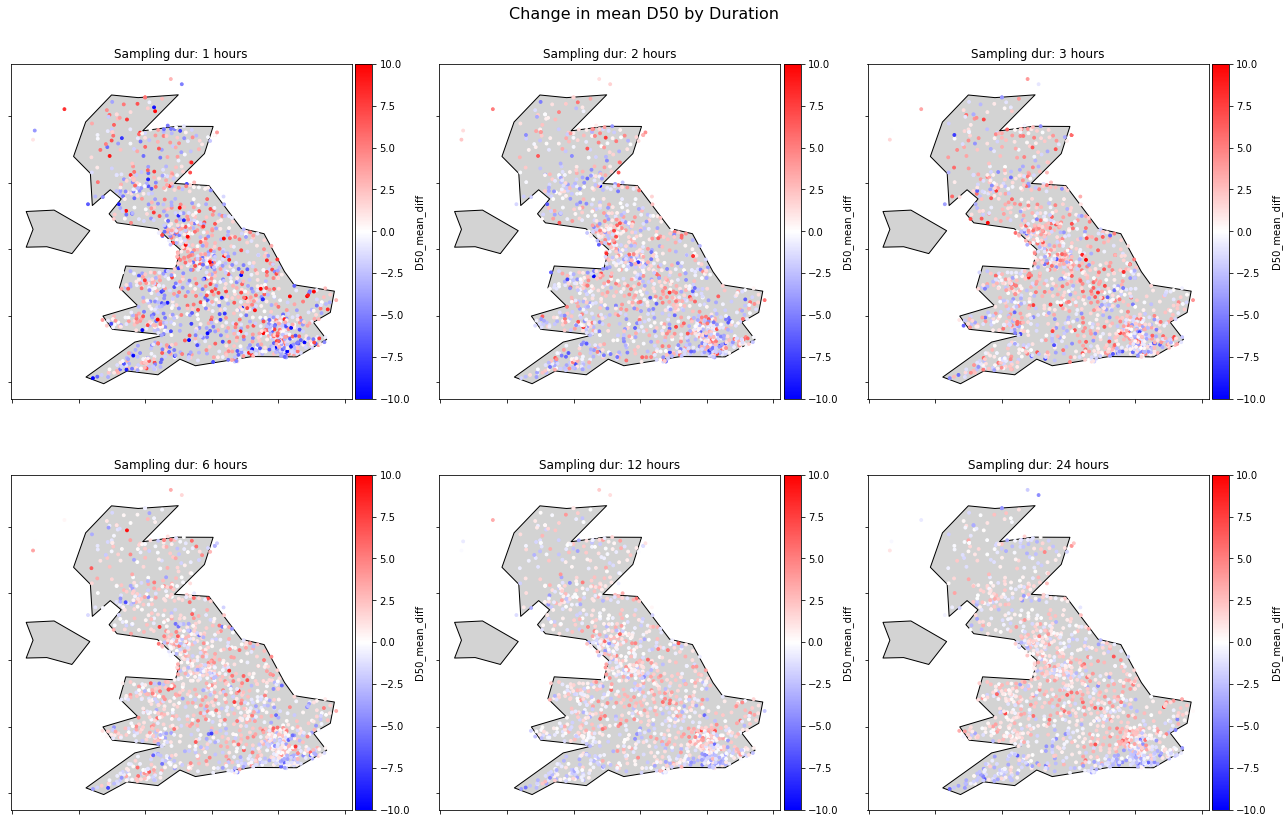

In [232]:
fig_D50 = plt.figure(figsize=(18, 12))
D50_axes = fig_D50.subplots(2, 3).flatten()  # Flatten the 2x4 grid into a 1D array

# Plot for each duration for theta
for i, duration in enumerate(durations):
    ax = D50_axes[i]  # Access the flattened array
    plot_change_variable_for_duration(ax, 'D50_mean_diff', duration, df_changes, tbo_vals, cmap='bwr')

# Adjust layout for theta figure
plt.suptitle('Change in mean D50 by Duration', fontsize=16)
# plt.subplots_adjust(top=0.9)  # Adjust title position
plt.tight_layout()
plt.show()

## Comparing methods

In [196]:
df_long = df_long.sort_values('Loading_profile_molly')
df_long = df_long.sort_values('Loading_profile_molly', key=lambda s: s.apply(['B2', 'B1', 'C', 'F1', 'F2'].index), ignore_index=True)
present = present.sort_values('Loading_profile_molly', key=lambda s: s.apply(['B2', 'B1', 'C', 'F1', 'F2'].index), ignore_index=True)
future = future.sort_values('Loading_profile_molly', key=lambda s: s.apply(['B2', 'B1', 'C', 'F1', 'F2'].index), ignore_index=True)

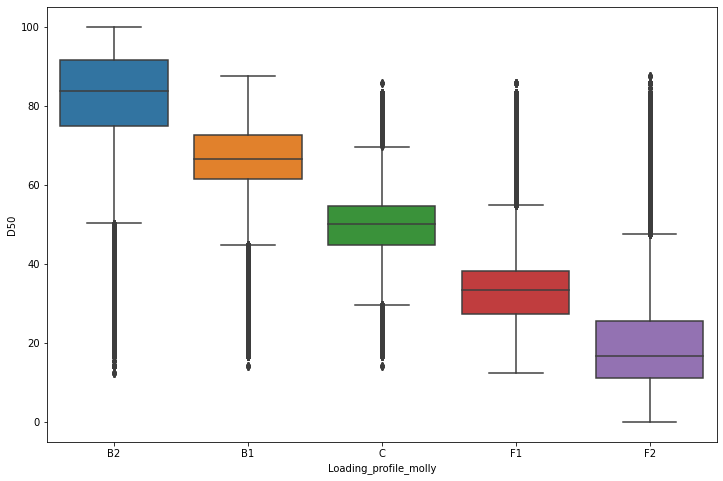

In [49]:
fig, axs = plt.subplots(figsize=(12,8))
plot_boxplot(df_long[['Loading_profile_molly', 'D50']], axs)
plt.show()

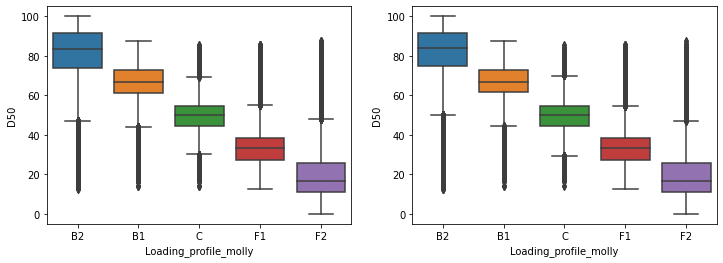

In [197]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
plot_boxplot(present[['Loading_profile_molly', 'D50']], axs[0])
plot_boxplot(future[['Loading_profile_molly', 'D50']], axs[1])
plt.show()

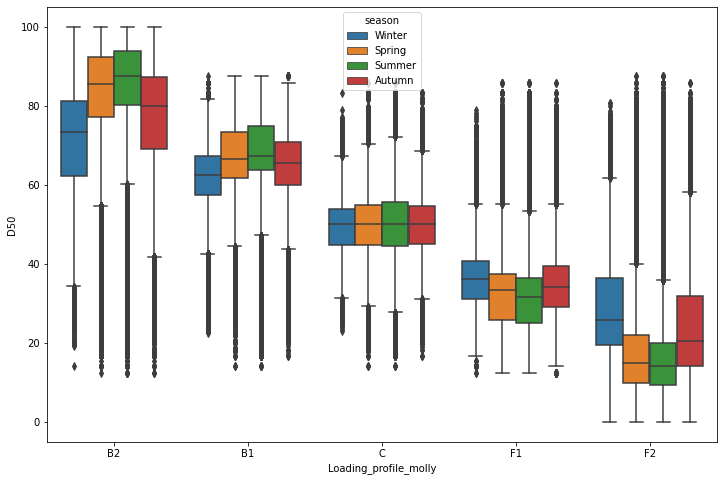

In [51]:
fig, axs = plt.subplots(figsize=(12,8))
plot_boxplot_by_season(df_long[['Loading_profile_molly', 'D50', 'season']], axs)
plt.show()

### Theta against Day of Year

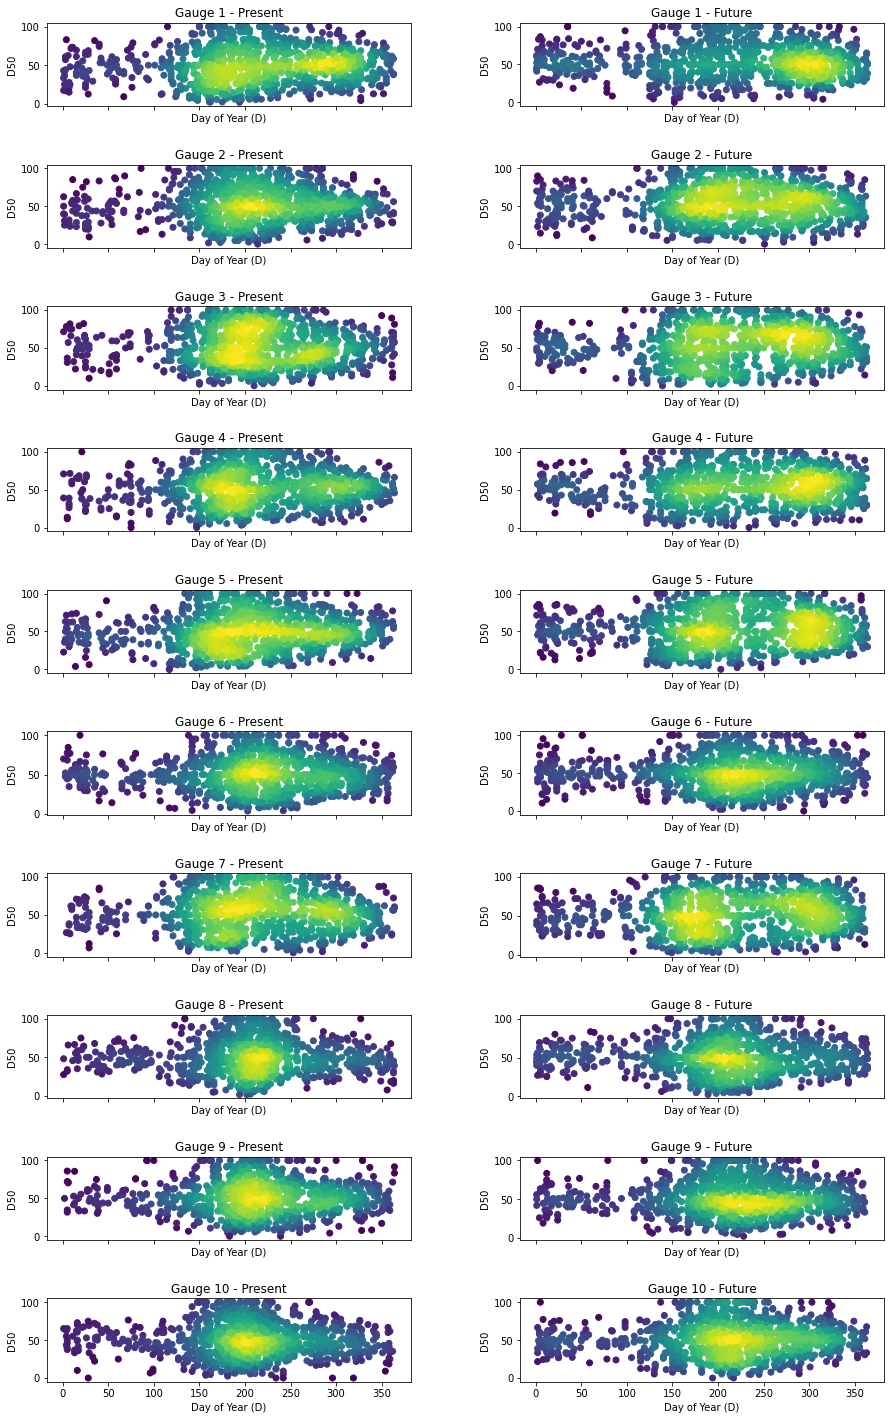

In [143]:
# Create a 10x2 subplot (10 rows, 2 columns)
fig, axs = plt.subplots(10, 2, figsize=(15, 25), sharex='col')
fig.subplots_adjust(hspace=0.7, wspace=0.3)  # Adjust space between plots

# Loop through gauge numbers from 1 to 10
for i, gauge_num in enumerate(range(1, 11)):
    
    # Filter data for the specific gauge number in 'present' dataset
    one_gauge_present = present[present['gauge_num'] == gauge_num]
    
    # Filter data for the specific gauge number in 'future' dataset
    one_gauge_future = future[future['gauge_num'] == gauge_num]
    
    # First column: Plot using the 'present' dataset
    ax_present = axs[i, 0]  # Access the correct subplot
    if not one_gauge_present.empty:
        one_gauge_present = one_gauge_present[['D', 'D50']]
        
        # Calculate point density using Gaussian KDE
        kde_present = stats.gaussian_kde(one_gauge_present.T)
        
        # Calculate density for each point
        density_present = kde_present(one_gauge_present.T)
        
        # Create a scatter plot for 'present' data with density-based coloring
        scatter_present = ax_present.scatter(one_gauge_present['D'], one_gauge_present['D50'], c=density_present, cmap='viridis', edgecolor=None)
    
    # Set title and labels for the 'present' plot
    ax_present.set_title(f'Gauge {gauge_num} - Present')
    ax_present.set_xlabel('Day of Year (D)')
    ax_present.set_ylabel('D50')

    # Second column: Plot using the 'future' dataset
    ax_future = axs[i, 1]  # Access the correct subplot
    if not one_gauge_future.empty:
        one_gauge_future = one_gauge_future[['D', 'D50']]
        
        # Calculate point density using Gaussian KDE
        kde_future = stats.gaussian_kde(one_gauge_future.T)
        
        # Calculate density for each point
        density_future = kde_future(one_gauge_future.T)
        
        # Create a scatter plot for 'future' data with density-based coloring
        scatter_future = ax_future.scatter(one_gauge_future['D'], one_gauge_future['D50'], c=density_future, cmap='viridis', edgecolor=None)

    # Set title and labels for the 'future' plot
    ax_future.set_title(f'Gauge {gauge_num} - Future')
    ax_future.set_xlabel('Day of Year (D)')
    ax_future.set_ylabel('D50')

# Add a colorbar for the last plot (adjust as needed)
# cbar = fig.colorbar(scatter_future, ax=axs, orientation='vertical', fraction=0.02, pad=0.02)
# cbar.set_label('Density')

# Display the plot
plt.show()


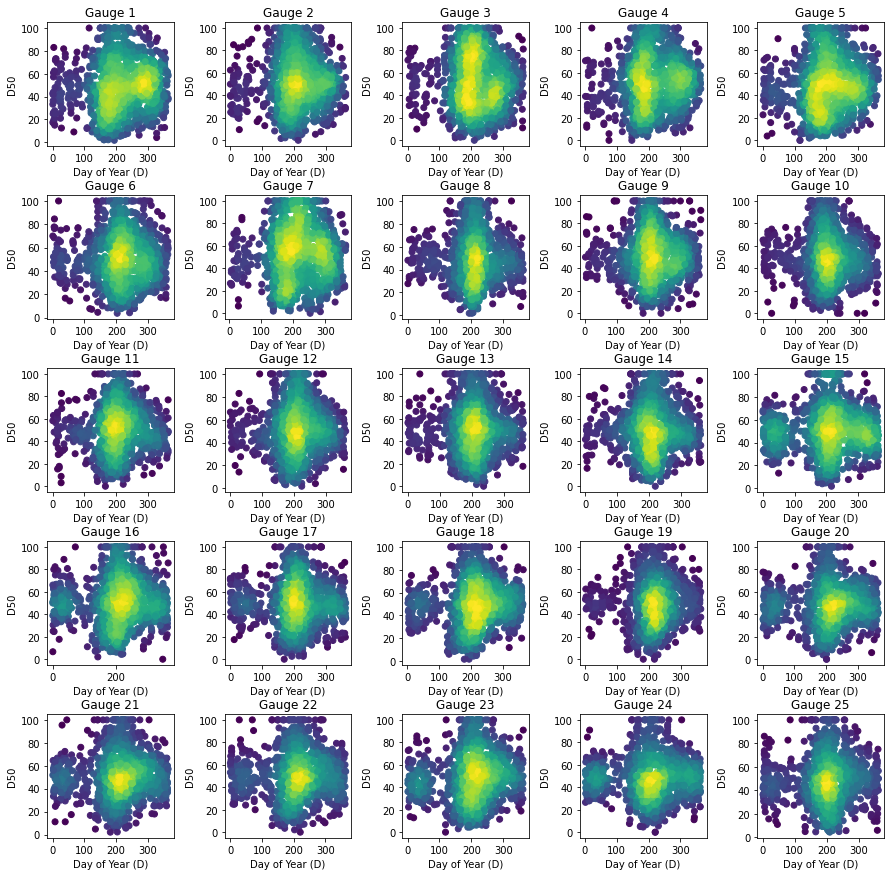

In [134]:
# Create a 5x5 subplot
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between plots

# Loop through gauge numbers from 1 to 25 (row and column indices)
for gauge_num, ax in enumerate(axs.flat, start=1):
    
    # Filter data for the specific gauge number
    one_gauge = present[present['gauge_num'] == gauge_num]
    
    # Check if there's any data for this gauge number
    if not one_gauge.empty:
        one_gauge = one_gauge[['D', 'D50']]
        
        # Calculate point density using Gaussian KDE
        kde = stats.gaussian_kde(one_gauge.T)  # Transpose to have dimensions (2, n_points)
        
        # Calculate density for each point
        density = kde(one_gauge.T)  # Evaluate the KDE at the original data points
        
        # Create a scatter plot with colors based on density
        scatter = ax.scatter(one_gauge['D'], one_gauge['D50'], c=density, cmap='viridis', edgecolor=None)
    
    # Set title and labels for each subplot
    ax.set_title(f'Gauge {gauge_num}')
    ax.set_xlabel('Day of Year (D)')
    ax.set_ylabel('D50')
    
# Display the plot
plt.show()


In [ ]:
test = present[['D', 'D50']][:100000]

# Calculate point density using Gaussian KDE
kde = stats.gaussian_kde(test.T)  # Transpose to have dimensions (2, n_points)

# Calculate density for each point
density = kde(test.T)  # Evaluate the KDE at the original data points

# Create a scatter plot with colors based on density
fig, ax = plt.subplots()
scatter = ax.scatter(test['D'], test['D50'], c=density, cmap='viridis', edgecolor=None)

In [ ]:
test = present[['D', 'D50']][:100000]

# Calculate point density using Gaussian KDE
kde = stats.gaussian_kde(test.T)  # Transpose to have dimensions (2, n_points)

# Calculate density for each point
density = kde(test.T)  # Evaluate the KDE at the original data points

# Create a scatter plot with colors based on density
fig, ax = plt.subplots()
scatter = ax.scatter(test['D'], test['D50'], c=density, cmap='viridis', edgecolor=None)

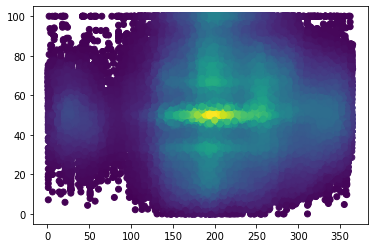

In [59]:
test = present[['D', 'D50']][:100000]

# Calculate point density using Gaussian KDE
kde = stats.gaussian_kde(test.T)  # Transpose to have dimensions (2, n_points)

# Calculate density for each point
density = kde(test.T)  # Evaluate the KDE at the original data points

# Create a scatter plot with colors based on density
fig, ax = plt.subplots()
scatter = ax.scatter(test['D'], test['D50'], c=density, cmap='viridis', edgecolor=None)

In [80]:
em = df_long[df_long['D50']==100]['em'].iloc[1]
gauge_num = df_long[df_long['D50']==100]['gauge_num'].iloc[1]
time_period = df_long[df_long['D50']==100]['Climate'].iloc[1]
filename =df_long[df_long['D50']==100]['filename'].iloc[1]

indy_events_fp = home_dir2 + f"ProcessedData/IndependentEvents/UKCP18_30mins/{time_period}/{em}/{gauge_num}/WholeYear/{filename}"
d50_100 = pd.read_csv(indy_events_fp)
d50_100

Unnamed: 0  precipitation (mm/hr)                times  precipitation (mm)  \
0       12692               0.000002  2078-09-25 10:15:00            0.000001   
1       12693               0.665941  2078-09-25 10:45:00            0.332971   
2       12694               2.957902  2078-09-25 11:15:00            1.478951   
3       12695               9.281527  2078-09-25 11:45:00            4.640763   
4       12696              39.303574  2078-09-25 12:15:00           19.651787   

   is_dry  Rolling_Sum  consecutive_dry  
0    True     0.000002              1.0  
1   False     0.332972              0.0  
2   False     1.811923              0.0  
3   False     6.452686              0.0  
4   False    26.104471              NaN

In [90]:
df_long[df_long['D50']==100]

season  duration DurationRange_personalised_allems  \
2       Summer       2.0                      0.25-2.10 hr   
3       Autumn       2.5                      0.25-2.10 hr   
5       Summer       2.0                      0.25-2.10 hr   
33      Summer       7.5                      2.10-6.45 hr   
50      Summer       9.5                      2.10-6.45 hr   
...        ...       ...                               ...   
425569  Autumn      10.0                      2.10-6.45 hr   
425577  Spring       8.0                      2.10-6.45 hr   
425587  Summer       4.0                      0.25-2.10 hr   
425590  Summer       2.0                      0.25-2.10 hr   
425594  Summer       2.5                      0.25-2.10 hr   

       DurationRange_notpersonalised DurationRange_simple  year  month  \
2                       0.25-2.10 hr                 <4hr  2079      8   
3                       2.10-6.45 hr                 <4hr  2078      9   
5                       0.25-2.10 hr                 <4hr  2072      8   
33                     6.45-19.25 hr               4-12hr  2063      7   
50                     6.45-19.25 hr               4-12hr  2072      7   
...                              ...                  ...   ...    ...   
425569                 6.45-19.25 hr               4-12hr  2006     10   
425577                 6.45-19.25 hr               4-12hr  2003      6   
425587                  2.10-6.45 hr                 <4hr  2016      7   
425590                  0.25-2.10 hr                 <4hr  2003      7   
425594                  2.10-6.45 hr                 <4hr  2007      8   

           Volume  max_intensity  max_quintile_molly  ...    D50       com  \
2       26.156942      34.115826                   5  ...  100.0  0.662390   
3       26.104473      39.303574                   5  ...  100.0  0.734129   
5       30.461336      33.200112                   5  ...  100.0  0.629883   
33      30.481977      37.708030                   5  ...  100.0  0.681195   
50      25.132291      25.760802                   5  ...  100.0  0.572467   
...           ...            ...                 ...  ...    ...       ...   
425569   0.396157       0.792290                   5  ...  100.0  0.949982   
425577  16.620785      18.766470                   5  ...  100.0  0.631173   
425587  12.643864      18.834694                   5  ...  100.0  0.770741   
425590  41.420669      56.974166                   5  ...  100.0  0.671938   
425594  13.794413      17.728592                   5  ...  100.0  0.609166   

       dur_for_which_this_is_amax gauge_num area     em  \
2                             2.0       391   SW  bb216   
3                             2.0       391   SW  bb216   
5                             2.0      1188   NE  bb195   
33                            0.5       393   SE  bb216   
50                            0.5       392   SW  bb216   
...                           ...       ...  ...    ...   
425569                       24.0       272   SE  bc013   
425577                        0.5       638   NW  bc007   
425587                        1.0      1202   NE  bc005   
425590                        2.0      1279   NW  bc012   
425594                        2.0       668   SE  bc013   

                        filename  Climate      D        date  
2         2hrs_2079_v2_part0.csv   Future  242.0  2079-08-30  
3         2hrs_2078_v2_part0.csv   Future  268.0  2078-09-25  
5         2hrs_2072_v2_part0.csv   Future  215.0  2072-08-02  
33      0.5hrs_2063_v2_part0.csv   Future  185.0  2063-07-04  
50      0.5hrs_2072_v2_part0.csv   Future  194.0  2072-07-12  
...                          ...      ...    ...         ...  
425569   24hrs_2006_v2_part1.csv  Present  285.0  2006-10-12  
425577  0.5hrs_2003_v2_part0.csv  Present  171.0  2003-06-20  
425587    1hrs_2016_v2_part0.csv  Present  204.0  2016-07-22  
425590    2hrs_2003_v2_part0.csv  Present  182.0  2003-07-01  
425594    2hrs_2007_v2_part0.csv  P

In [120]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [123]:
n=425569 #425569
em = df_long[df_long['D50']==100]['em'].loc[n]
gauge_num = df_long[df_long['D50']==100]['gauge_num'].loc[n]
time_period = df_long[df_long['D50']==100]['Climate'].loc[n]
filename =df_long[df_long['D50']==100]['filename'].loc[n]

indy_events_fp = home_dir2 + f"ProcessedData/IndependentEvents/UKCP18_30mins/{time_period}/{em}/{gauge_num}/WholeYear/{filename}"
d50_100 = pd.read_csv(indy_events_fp)
d50_100

Unnamed: 0  precipitation (mm/hr)                times  \
0        13501               0.000004  2006-10-12 06:45:00   
1        13502               0.000000  2006-10-12 07:15:00   
2        13503               0.000004  2006-10-12 07:45:00   
3        13504               0.000003  2006-10-12 08:15:00   
4        13505               0.000001  2006-10-12 08:45:00   
5        13506               0.000000  2006-10-12 09:15:00   
6        13507               0.000000  2006-10-12 09:45:00   
7        13508               0.000000  2006-10-12 10:15:00   
8        13509               0.000000  2006-10-12 10:45:00   
9        13510               0.000001  2006-10-12 11:15:00   
10       13511               0.000001  2006-10-12 11:45:00   
11       13512               0.000001  2006-10-12 12:15:00   
12       13513               0.000000  2006-10-12 12:45:00   
13       13514               0.000003  2006-10-12 13:15:00   
14       13515               0.000001  2006-10-12 13:45:00   
15       13516               0.000002  2006-10-12 14:15:00   
16       13517               0.000001  2006-10-12 14:45:00   
17       13518               0.000001  2006-10-12 15:15:00   
18       13519               0.000001  2006-10-12 15:45:00   
19       13520               0.792290  2006-10-12 16:15:00   

    precipitation (mm)  is_dry  Rolling_Sum  consecutive_dry  
0             0.000002    True    34.305133        14.000000  
1             0.000000    True    34.305132        15.000000  
2             0.000002    True    34.305133        16.000000  
3             0.000001    True    34.305133        17.000000  
4             0.000000    True    34.305132        18.000000  
5             0.000000    True    34.305132        19.000000  
6             0.000000    True    34.305132        20.000000  
7             0.000000    True    34.305132        21.000000  
8             0.000000    True    34.305131        22.000000  
9             0.000000    True    34.305131        23.000000  
10            0.000000    True    34.305131        24.000000  
11            0.000000    True    34.305131        25.000000  
12            0.000000    True    34.305056        26.000000  
13            0.000002    True    34.305057        27.000000  
14            0.000000    True    34.305057        28.000000  
15            0.000001    True    34.305057        29.000000  
16            0.000001    True    34.305057        30.000000  
17            0.000000    True    34.305057        31.000000  
18            0.000000    True    34.305058        32.000000  
19            0.396145   False    34.697913              NaN

In [82]:
# df_long[df_long['D50']==100].iloc[0]

In [113]:
(bottom_of_window + top_of_window)/2

87.5

In [118]:
precipitation_values = d50_100['precipitation (mm)']
precipitation_values = np.array(precipitation_values)
cumulative_precip = np.cumsum(precipitation_values)
# Step 2: Determine the total precipitation
total_precip = cumulative_precip[-1]
halfway_precip = total_precip / 2.0
D50_index = np.where(cumulative_precip >= halfway_precip)[0][0]
total_timesteps = len(precipitation_values)
x = 100/total_timesteps
bottom_of_window = x* (D50_index+1)
top_of_window = x* D50_index
(bottom_of_window + top_of_window)/2


97.5

In [119]:
precipitation_values = d50_100['precipitation (mm)']

# Ensure input is a numpy array
precipitation_values = np.array(precipitation_values)

# Step 1: Calculate the cumulative precipitation
cumulative_precip = np.cumsum(precipitation_values)

# Step 2: Determine the total precipitation
total_precip = cumulative_precip[-1]

# Step 3: Find the index where 50% of the total precipitation is reached
halfway_precip = total_precip / 2.0
D50_index = np.where(cumulative_precip >= halfway_precip)[0][0]  # First index where cumulative precipitation >= 50%

# Step 4: Calculate the percentage of the event duration (D50)
total_timesteps = len(precipitation_values)
D50 = (D50_index / (total_timesteps - 1)) * 100
D50

100.0

In [ ]:
d50, d50_index, cumulative_precip =calculate_D50(this_event['precipitation (mm)'])

In [ ]:
def calculate_D50(precipitation_values):
    """
    Calculate D50, the point in time when 50% of cumulative precipitation has occurred during an event.
    
    Parameters:
    - precipitation_values: A list or array of precipitation values for a given event.
    
    Returns:
    - D50: The percentage of the event elapsed when 50% of cumulative precipitation has occurred.
    - D50_index: The index where 50% of cumulative precipitation has occurred.
    - cumulative_precip: The cumulative precipitation values for the event.
    """
    # Ensure input is a numpy array
    precipitation_values = np.array(precipitation_values)
    
    # Step 1: Calculate the cumulative precipitation
    cumulative_precip = np.cumsum(precipitation_values)
    
    # Step 2: Determine the total precipitation
    total_precip = cumulative_precip[-1]
    
    # Step 3: Find the index where 50% of the total precipitation is reached
    halfway_precip = total_precip / 2.0
    D50_index = np.where(cumulative_precip >= halfway_precip)[0][0]  # First index where cumulative precipitation >= 50%
    
    # Step 4: Calculate the percentage of the event duration (D50)
    total_timesteps = len(precipitation_values)
    D50 = (D50_index / (total_timesteps - 1)) * 100

    return D50, D50_index, cumulative_precip


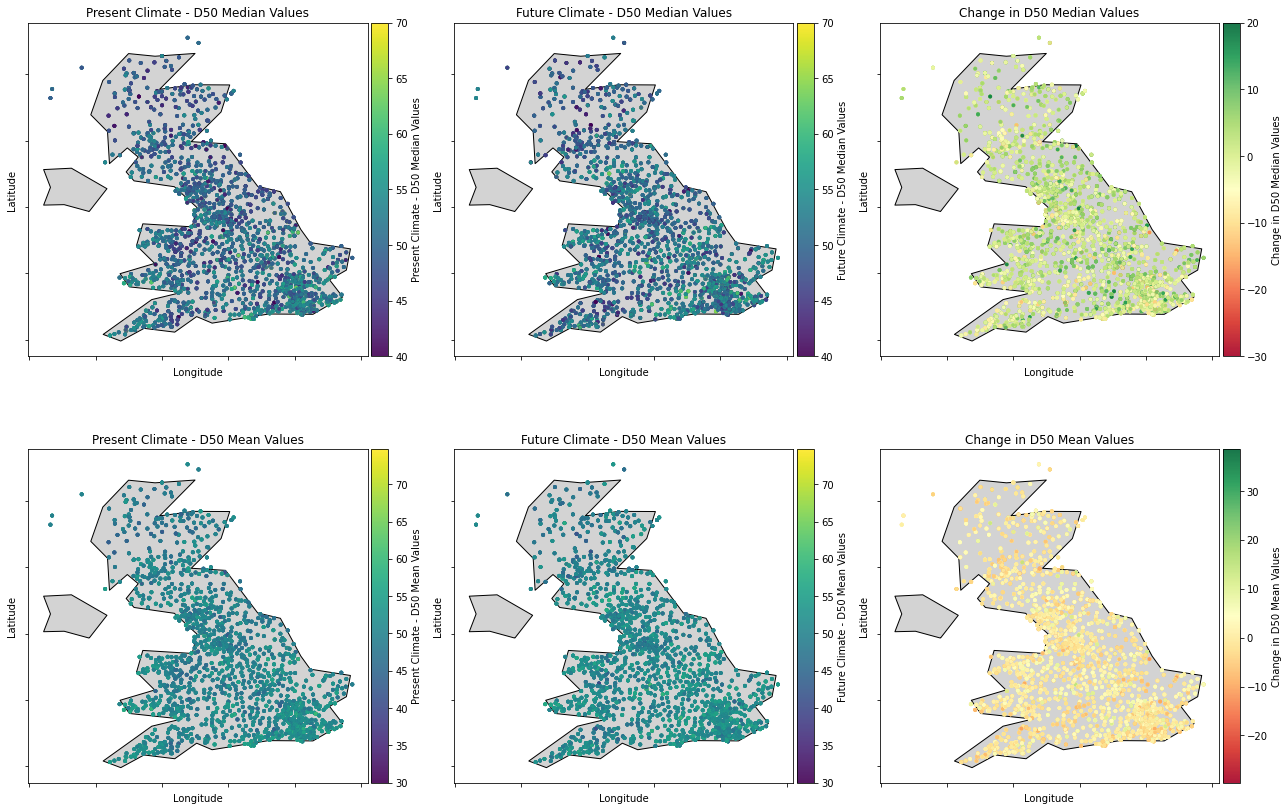

In [153]:
df_changes_by_season = df_changes_autumn

# Create a figure and axes for the six subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Present Climate 
present_medianD50_data = df_changes_by_season[['gauge_num', 'D50_median_present']].copy()
present_medianD50_data['Climate'] = 'present'  # Add a Climate column for clarity
# Future Climate
future_medianD50_data = df_changes_by_season[['gauge_num', 'D50_median_future']].copy()
future_medianD50_data['Climate'] = 'future'  # Add a Climate column for clarity

global_min = min(present_medianD50_data['D50_median_present'].min(),
    future_medianD50_data['D50_median_future'].min())

global_max = max(present_medianD50_data['D50_median_present'].max(),
    future_medianD50_data['D50_median_future'].max())


plot_values_on_map(axes[0, 0], present_medianD50_data, 'Present Climate - D50 Median Values', tbo_vals,
                   'D50_median_present', 40, 70)
plot_values_on_map(axes[0, 1], future_medianD50_data, 'Future Climate - D50 Median Values', tbo_vals, 
                    'D50_median_future', 40, 70)

# # Change 
change_medianD50_data = df_changes_by_season[['gauge_num', 'D50_median_diff']].copy()
change_medianD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[0, 2], change_medianD50_data, 'Change in D50 Median Values', tbo_vals, 'D50_median_diff', 
                   vmin=-30, vmax=20, cmap = 'RdYlGn')


present_meanD50_data = df_changes_by_season[['gauge_num', 'D50_mean_present']].copy()
present_meanD50_data['Climate'] = 'present'  # Add a Climate column for clarity
future_meanD50_data = df_changes_by_season[['gauge_num', 'D50_mean_future']].copy()
future_meanD50_data['Climate'] = 'present'  # Add a Climate column for clarity

global_min = min(present_meanD50_data['D50_mean_present'].min(),
    future_meanD50_data['D50_mean_future'].min())

global_max = max(present_meanD50_data['D50_mean_present'].max(),
    future_meanD50_data['D50_mean_future'].max())


plot_values_on_map(axes[1, 0], present_meanD50_data, 'Present Climate - D50 Mean Values', tbo_vals, 
                   'D50_mean_present', global_min, global_max)
plot_values_on_map(axes[1, 1], future_meanD50_data, 'Future Climate - D50 Mean Values', tbo_vals, 
                    'D50_mean_future', global_min, global_max)

# # Change 
change_meanD50_data = df_changes_by_season[['gauge_num', 'D50_mean_diff']].copy()
change_meanD50_data['Climate'] = 'change'  # Add a Climate column for clarity
plot_values_on_map(axes[1, 2], change_meanD50_data, 'Change in D50 Mean Values', tbo_vals, 'D50_mean_diff', 
                   vmin=None, vmax=None, cmap = 'RdYlGn')

# Adjust layout
plt.tight_layout()
